## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

def build_mlp1(input_shape, output_units=10, num_neurons=[512, 256, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.15, 0.25, 0.35]

In [11]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i in range(2):
    for dropout in Dropout_EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        if i == 0:
            model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dropout)
        else:
            model = build_mlp1(input_shape=x_train.shape[1:], drp_ratio=dropout)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
    
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = "exp-l2-%d-%s" %(i, str(dropout))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

50000/50000 [==============================] - 7s 133us/step - loss: 1.1780 - acc: 0.5801 - val_loss: 1.2910 - val_acc: 0.5401
Epoch 50/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.1713 - acc: 0.5830 - val_loss: 1.2878 - val_acc: 0.5393
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
________

Epoch 48/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.2967 - acc: 0.5370 - val_loss: 1.3123 - val_acc: 0.5328
Epoch 49/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.2883 - acc: 0.5395 - val_loss: 1.3084 - val_acc: 0.5308
Epoch 50/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.2880 - acc: 0.5391 - val_loss: 1.3124 - val_acc: 0.5328
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               

50000/50000 [==============================] - 6s 130us/step - loss: 1.4297 - acc: 0.4888 - val_loss: 1.3881 - val_acc: 0.4999
Epoch 47/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.4241 - acc: 0.4889 - val_loss: 1.3760 - val_acc: 0.5027
Epoch 48/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.4252 - acc: 0.4902 - val_loss: 1.3774 - val_acc: 0.5096
Epoch 49/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.4169 - acc: 0.4930 - val_loss: 1.3628 - val_acc: 0.5156
Epoch 50/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.4093 - acc: 0.4947 - val_loss: 1.3602 - val_acc: 0.5118
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)             

Epoch 43/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.2365 - acc: 0.5579 - val_loss: 1.3043 - val_acc: 0.5348
Epoch 44/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.2229 - acc: 0.5627 - val_loss: 1.3060 - val_acc: 0.5326
Epoch 45/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.2185 - acc: 0.5657 - val_loss: 1.2969 - val_acc: 0.5388
Epoch 46/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.2095 - acc: 0.5678 - val_loss: 1.3043 - val_acc: 0.5367
Epoch 47/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.2070 - acc: 0.5660 - val_loss: 1.2986 - val_acc: 0.5387
Epoch 48/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.1955 - acc: 0.5696 - val_loss: 1.3019 - val_acc: 0.5372
Epoch 49/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.1867 - acc: 0.5741 - val_loss: 1.3060 - val_acc: 0.5366
Epoch 50/50
50000/50000 [==

Epoch 40/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.3829 - acc: 0.5087 - val_loss: 1.3673 - val_acc: 0.5070
Epoch 41/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.3733 - acc: 0.5062 - val_loss: 1.3546 - val_acc: 0.5175
Epoch 42/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.3662 - acc: 0.5131 - val_loss: 1.3413 - val_acc: 0.5192
Epoch 43/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.3628 - acc: 0.5140 - val_loss: 1.3437 - val_acc: 0.5200
Epoch 44/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.3512 - acc: 0.5161 - val_loss: 1.3472 - val_acc: 0.5163
Epoch 45/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.3486 - acc: 0.5172 - val_loss: 1.3492 - val_acc: 0.5231
Epoch 46/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.3389 - acc: 0.5224 - val_loss: 1.3342 - val_acc: 0.5226
Epoch 47/50
50000/50000 [==

50000/50000 [==============================] - 7s 130us/step - loss: 1.5413 - acc: 0.4462 - val_loss: 1.4525 - val_acc: 0.4793
Epoch 37/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.5294 - acc: 0.4458 - val_loss: 1.4516 - val_acc: 0.4793
Epoch 38/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.5270 - acc: 0.4495 - val_loss: 1.4471 - val_acc: 0.4791
Epoch 39/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.5227 - acc: 0.4515 - val_loss: 1.4354 - val_acc: 0.4828
Epoch 40/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.5179 - acc: 0.4529 - val_loss: 1.4387 - val_acc: 0.4848
Epoch 41/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.5051 - acc: 0.4556 - val_loss: 1.4346 - val_acc: 0.4890
Epoch 42/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.4971 - acc: 0.4602 - val_loss: 1.4195 - val_acc: 0.4902
Epoch 43/50
50000/50000 [==============

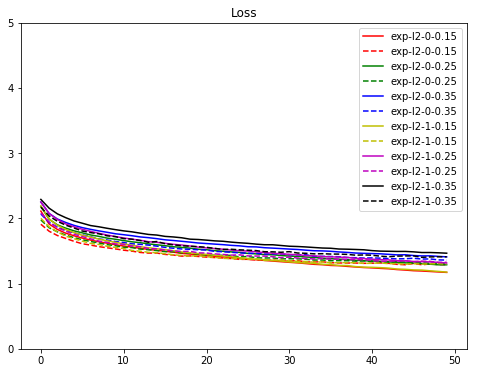

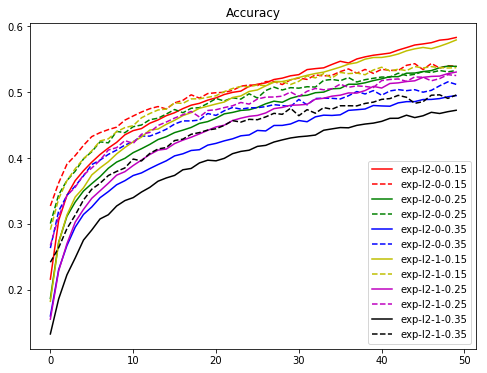

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()